In [ ]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 
# seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')



In [15]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.948596,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2


In [ ]:
for col in df_train.columns:
    msg = 'colums: {:<10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)


In [ ]:
for col in df_test.columns:
    msg = 'colums: {:>10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)


In [ ]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.3, 0.2))

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))#도화지

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [ ]:
df_train['Survived'].value_counts().plot().pie(explode)

In [ ]:
plt.plot(df_train['Survived'].value_counts())

2.1 Pclass

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

In [ ]:
pd.crosstab(df_train['Pclass'], df_train["Survived"], margins=True).style.background_gradient(cmap='cool')

In [ ]:
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot().bar()

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers by Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

2.2 Sex

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

2.2 Both Pclass and Sex


In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data = df_train, size=6, aspect=1.5)

1. Lady first
2. Money brings survival?

In [ ]:
sns.factorplot(x='Sex', y='Survived', col = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

In [ ]:
sns.factorplot(x='Sex', y='Survived', hue = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

2.3. Age

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survied == 1', 'Survived == 0'])
plt.show()

In [ ]:
df_train[df_train['Survived'] == 1]['Age'].hist()

In [ ]:
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
plt.show()

In [ ]:
f = plt.figure(figsize = (5,5))

f, ax = plt.subplots(1,1,figsize=(5,5))

plt.figure(figsize=(10,10))

In [ ]:
f = plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

In [ ]:
f, ax = plt.subplots(1,1,figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)

In [ ]:
plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


- 1~80 살 까지 (i) 생존확률의 변화

In [ ]:
change_age_range_survival_ratio = []

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## Pclass, Sex, Age
---



In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data=df_train, scale="count",split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110, 10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Embarked
---
- 탑승한 곳

In [ ]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',ascending = False).plot.bar(ax=ax)

In [ ]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

In [ ]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

- Embarked를 다른 Feature와 비교

In [ ]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title("(1)No. Of Passengers Boared")

sns.countplot('Embarked', hue = 'Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title("(2)No. Male-Female split for embarked")

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,1])
ax[1,1].set_title("(3)No. Embarked vs Survived")

sns.countplot('Embarked', hue = 'Pclass', data=df_train, ax=ax[1,0])
ax[1,0].set_title("(4)No. Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)# 1행과 2행의 간격 벌려줌

plt.show()

### Family - SibSp + Parch

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [ ]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Maximum size of Family: ', df_train['FamilySize'].min())

In [ ]:
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize', data = df_train, ax=ax[0])
ax[0].set_title('(1)No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Fare

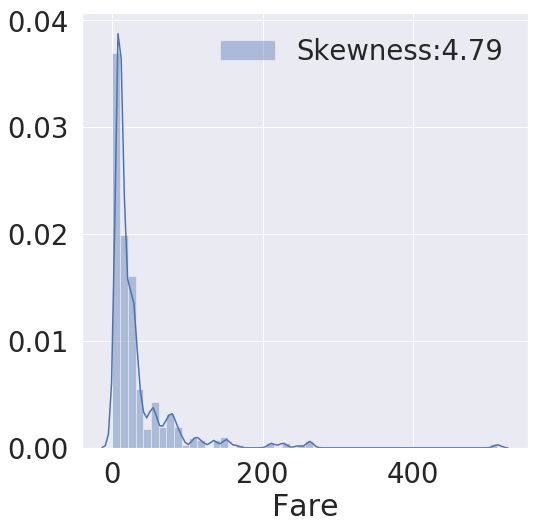

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [13]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

> skewness 가 0 으로 가겠금 하는 작업,  feature를 정확하게 바꾸는 작업,

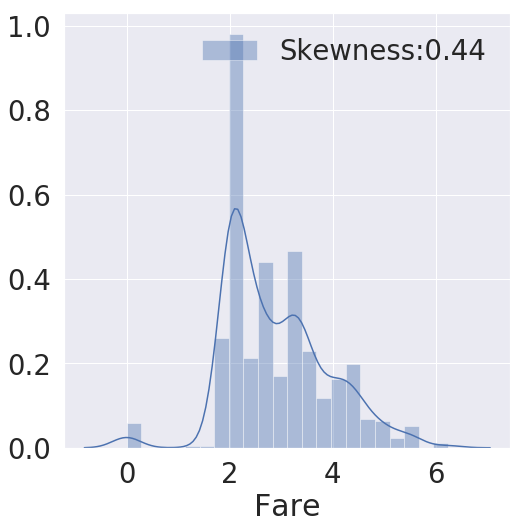

In [14]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### Ticket

In [16]:
df_train['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
CA 2144              6
3101295              6
347088               6
S.O.C. 14879         5
382652               5
347077               4
4133                 4
LINE                 4
113760               4
2666                 4
17421                4
19950                4
W./C. 6608           4
349909               4
113781               4
PC 17757             4
C.A. 34651           3
13502                3
PC 17582             3
110152               3
29106                3
35273                3
SC/Paris 2123        3
248727               3
371110               3
PC 17572             3
345773               3
                    ..
365222               1
A4. 54510            1
4135                 1
113794               1
244361               1
2662                 1
335677               1
SO/C 14885           1
323951               1
6563                 1
364851               1
STON/O 2. 3101274    1
112053     

> feature engineering이 필요한 부분, 어떤 로직으로 정리할지 생각해 보자..

### Feature enginering

- null data를 어떻게 처리할 것인가..

In [28]:
df_train['Age'].isnull().sum()

177

In [32]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [34]:
# df_test.head()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [38]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [57]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)



In [58]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.798677,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [44]:
df_train.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.704301
Mr        0.162571
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64

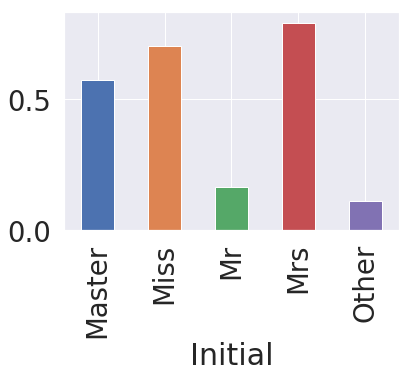

In [45]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [59]:
df_all = pd.concat([df_train, df_test])

In [60]:
df_all

,Age,Cabin,Embarked,FamilySize,Fare,Initial,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,2.0,1.981001,Mr,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,2.0,4.266662,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,1.0,2.070022,Miss,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,2.0,3.972177,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,1.0,2.085672,Mr,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,33.0,NaN,Q,1.0,2.135148,Mr,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,1.0,3.948596,Mr,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,5.0,3.048088,Master,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,3.0,2.409941,Mrs,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,2.0,3.403555,Mrs,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [61]:
df_all.groupby('Initial').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,,
Master,5.482642,4.675000,15.442677,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,2.236559,14.021188,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.630952,1.444234,10.003941,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.511811,23.896996,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.222222,24.523034,0.153846,714.923077,1.615385,0.230769,0.111111


In [70]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial


In [63]:
df_all.groupby('Initial').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,,
Master,5.482642,4.675000,15.442677,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,2.236559,14.021188,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.630952,1.444234,10.003941,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.511811,23.896996,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.222222,24.523034,0.153846,714.923077,1.615385,0.230769,0.111111


In [66]:
df_train.loc[(df_train['Initial'] == 'Mr'),'Age'].head()

0     22.0
4     35.0
5     33.0
6     54.0
12    20.0
Name: Age, dtype: float64

In [67]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 45

df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 45

In [68]:
df_train['Age'].isnull().sum()


0

In [69]:
df_train['Age'].isnull().sum()

0